In [270]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_colwidth = 500

In [271]:
df=pd.read_csv('Initial survey.csv')

In [272]:
df.head(5)

,Timestamp,Username,Enter your Email ID,Enter your age,Rate your experience in Python programming,Rate your understanding/prior knowledge of ML,How comfortable are you with high school math? (Linear Algebra and Geometry),Rate your knowledge of basic shell commands in Linux,Familiarity with the Data-Science libraries,Why do you want to explore ML?,In what ways do you think data science could make our lives better?,What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)
0,2020/04/15 3:28:20 PM GMT+5:30,akillika49@gmail.com,akillika49@gmail.com,17,Beginner,2,4,2,1,I've read articles on ML/AI and I'm interested,Bla bla bla,Bla bla bla
1,2020/04/15 4:49:55 PM GMT+5:30,NaN,nishalprince2000@gmail.com,19,Intermediate,3,5,1,4,It'll help my career,Data is the new oil . But unlike oil it isn't non renewable and in this modern age there are thousands of petabytes of data flowing around. And I think it's important to know how to manipulate them and draw the best out of it to make our lives better . It can be immensely used in marketing and financial domains as it helps us with prediction of the cost of a stock in the future not precisely but the result will definitely follow the trend. There is data everywhere but people who know to hand...,"I'd like to know how Machine learning works. The theorey , the math behind it and how it apply it in the real world. I'd like to know how to implement it onto the real world. How to handle a dataset. How preprocess them . And how to implement the required model according to the dataset . I certainly believe that even though in python it's almost just about importing libraries , a good data scientist is born if he/she understands what happens in the background of the model (the theorey ) eve..."
2,2020/04/15 7:15:26 PM GMT+5:30,NaN,122015125@sastra.ac.in,20,Intermediate,4,5,3,3,I've read articles on ML/AI and I'm interested;It'll help my career;It'll help me do a project,"If you ask me, every nook and corner of this world can be changed for a better living using ML and AI.","Everything I can with this workshop. I have knowledge on different algorithms but that is not giving me the satisfaction. So help me out in learning how ML is used in real world situations. Even in mobiles we having ML integrated, so I wanna learn that type of ML usage."
3,2020/04/15 7:17:06 PM GMT+5:30,NaN,tsvmanoj7@gmail.com,18,Beginner,2,2,1,1,I've read articles on ML/AI and I'm interested,18,HAVING BASIC KNOWLEDGE OF WHAT IS ML AND ITS APPLICATIONS IN CONCEPTUAL MANNER
4,2020/04/15 7:18:29 PM GMT+5:30,NaN,gpsjeevi@gmail.com,18,Beginner,3,3,2,3,I've read articles on ML/AI and I'm interested;It'll help my career;It'll help me do a project,it makes us to show recommendations in shopping also in research also tells the experienced knowledge though number of trials.,having a better knowledge in python programming and also the libraries and style of creating models using existing ML algorithms.


In [273]:
df.columns

Index(['Timestamp', 'Username', 'Enter your Email ID', 'Enter your age',
       'Rate your experience in Python programming',
       'Rate your understanding/prior knowledge of ML',
       'How comfortable are you with high school math? (Linear Algebra and Geometry)',
       'Rate your knowledge of basic shell commands in Linux',
       'Familiarity with the Data-Science libraries',
       'Why do you want to explore ML?',
       'In what ways do you think data science could make our lives better?',
       'What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'],
      dtype='object')

In [274]:
df=df[['Rate your experience in Python programming',
       'Rate your understanding/prior knowledge of ML',
       'How comfortable are you with high school math? (Linear Algebra and Geometry)',
       'Rate your knowledge of basic shell commands in Linux',
       'Familiarity with the Data-Science libraries',
       'Why do you want to explore ML?',
       'In what ways do you think data science could make our lives better?',
       'What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']]

In [275]:
df.head(5)

,Rate your experience in Python programming,Rate your understanding/prior knowledge of ML,How comfortable are you with high school math? (Linear Algebra and Geometry),Rate your knowledge of basic shell commands in Linux,Familiarity with the Data-Science libraries,Why do you want to explore ML?,In what ways do you think data science could make our lives better?,What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)
0,Beginner,2,4,2,1,I've read articles on ML/AI and I'm interested,Bla bla bla,Bla bla bla
1,Intermediate,3,5,1,4,It'll help my career,Data is the new oil . But unlike oil it isn't non renewable and in this modern age there are thousands of petabytes of data flowing around. And I think it's important to know how to manipulate them and draw the best out of it to make our lives better . It can be immensely used in marketing and financial domains as it helps us with prediction of the cost of a stock in the future not precisely but the result will definitely follow the trend. There is data everywhere but people who know to hand...,"I'd like to know how Machine learning works. The theorey , the math behind it and how it apply it in the real world. I'd like to know how to implement it onto the real world. How to handle a dataset. How preprocess them . And how to implement the required model according to the dataset . I certainly believe that even though in python it's almost just about importing libraries , a good data scientist is born if he/she understands what happens in the background of the model (the theorey ) eve..."
2,Intermediate,4,5,3,3,I've read articles on ML/AI and I'm interested;It'll help my career;It'll help me do a project,"If you ask me, every nook and corner of this world can be changed for a better living using ML and AI.","Everything I can with this workshop. I have knowledge on different algorithms but that is not giving me the satisfaction. So help me out in learning how ML is used in real world situations. Even in mobiles we having ML integrated, so I wanna learn that type of ML usage."
3,Beginner,2,2,1,1,I've read articles on ML/AI and I'm interested,18,HAVING BASIC KNOWLEDGE OF WHAT IS ML AND ITS APPLICATIONS IN CONCEPTUAL MANNER
4,Beginner,3,3,2,3,I've read articles on ML/AI and I'm interested;It'll help my career;It'll help me do a project,it makes us to show recommendations in shopping also in research also tells the experienced knowledge though number of trials.,having a better knowledge in python programming and also the libraries and style of creating models using existing ML algorithms.


In [276]:
df['Rate your experience in Python programming'].value_counts()

Beginner         81
Intermediate     62
No experience    31
Expert            4
Name: Rate your experience in Python programming, dtype: int64

In [277]:
df[df['Rate your experience in Python programming']=='No experience']['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']

6                                                                                                                                                                                                                                                                                                                                                                                   Basic ml knowledge
7                                                                                                                                                                                                                                                                                                                                                      I just need a brief outline about those topics 
12                                                                                                                                                                                                                        

In [278]:
df_noexp=df[df['Rate your experience in Python programming']=='No experience']['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']

In [279]:
count_vect = CountVectorizer(ngram_range=(1,2))
final_bigram_counts = count_vect.fit_transform(df_noexp)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (31, 464)
the number of unique words including both unigrams and bigrams  464


In [280]:
final_bigram_counts

<31x464 sparse matrix of type '<class 'numpy.int64'>'
	with 655 stored elements in Compressed Sparse Row format>

In [281]:
np_arr=final_bigram_counts.todense()

In [282]:
type(np_arr)

numpy.matrix

In [283]:
np_arr=np.array(np_arr)

In [284]:
type(np_arr)

numpy.ndarray

In [285]:
np_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [286]:
np_arr[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [287]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect.fit(df_noexp)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(df_noexp)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['ability', 'ability to', 'about', 'about data', 'about mi', 'about ml', 'about the', 'about those', 'achieve', 'achieve my']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (31, 464)
the number of unique words including both unigrams and bigrams  464


In [288]:
np_arr_tfidf=np.array(final_tf_idf.toarray())

In [289]:
type(np_arr_tfidf)

numpy.ndarray

In [290]:
np_arr_tfidf.shape

(31, 464)

In [291]:
np_arr_tfidf[3]

array([0.        , 0.        , 0.15569063, 0.        , 0.        ,
       0.1924568 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [292]:
type(df_noexp)

pandas.core.series.Series

In [293]:
df_noexp

6                                                                                                                                                                                                                                                                                                                                                                                   Basic ml knowledge
7                                                                                                                                                                                                                                                                                                                                                      I just need a brief outline about those topics 
12                                                                                                                                                                                                                        

In [294]:
df_noexp = df_noexp.reset_index(drop=True)

In [295]:
df_noexp.head(5)

0                                                                                                  Basic ml knowledge
1                                                                     I just need a brief outline about those topics 
2                                                                     Better programming skills and knowledge on them
3                                                                           Know about ml what iy does gow to operate
4    To know the basics of machine learning and how well can i use it in my area of engineering(Chemical Engineering)
Name: What skills do you expect to have acquired by the end of the workshop?(Please explain extensively), dtype: object

In [296]:
from sklearn.preprocessing import normalize
np_arrn=normalize(np_arr)

In [297]:
np_arrn

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.2773501 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37796447, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

<h2>K-Means Clustering</h2>

<h4>Applying K-Means Clustering on BOW</h4>

In [298]:
%%time
from sklearn.cluster import KMeans


k_inertia=[]

k=[2,4,6,8]
for i in k:

        k_m= KMeans(n_clusters=i,init='k-means++', random_state=0)
        k_m.fit(np_arrn)
        k_inertia.append(k_m.inertia_)
        print("cluster",i,"done")

cluster 2 done
cluster 4 done
cluster 6 done
cluster 8 done
Wall time: 244 ms


In [299]:
print(k_inertia)

[24.622841053335904, 21.809469515573774, 19.784893779692506, 17.564400748813032]


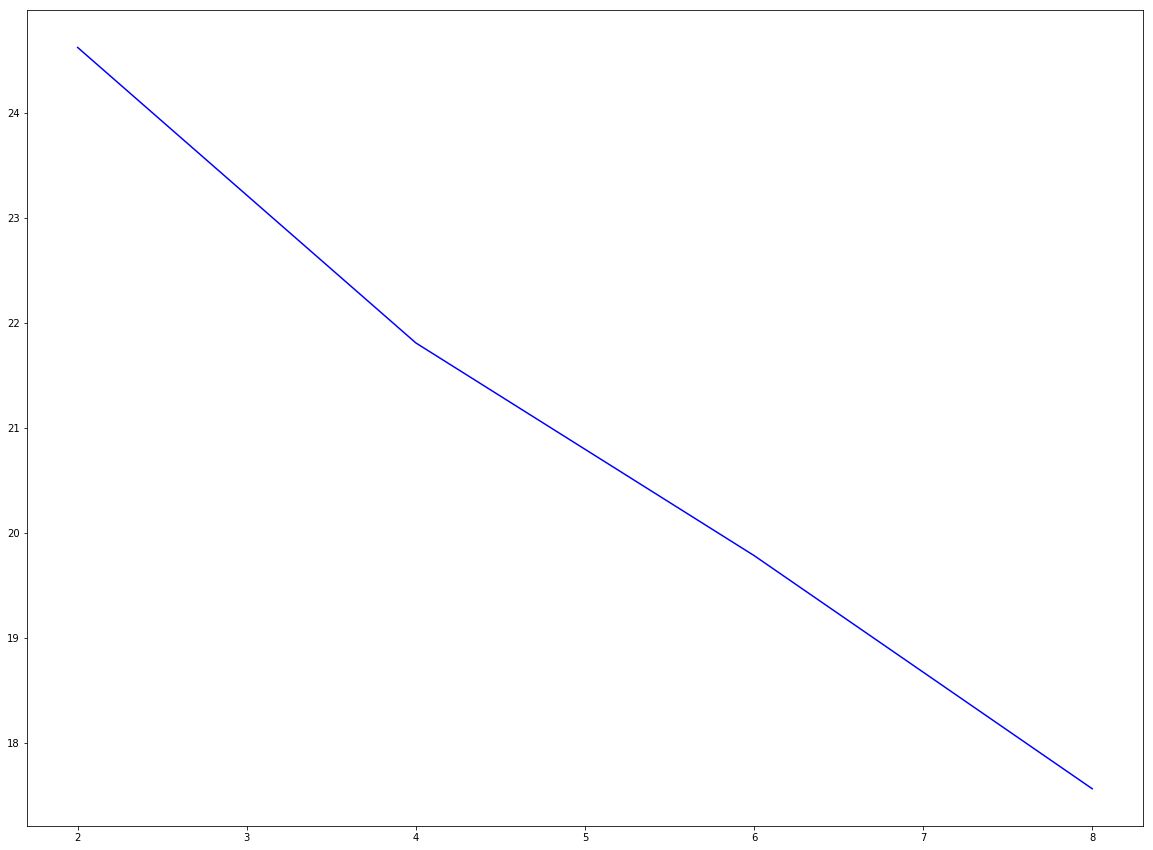

In [300]:
plt.figure(figsize = (20,15))
plt.plot(k,k_inertia,color='blue')

In [301]:
label=k_m.labels_

In [302]:
print(label)

[2 0 5 2 3 2 1 6 1 3 4 1 2 3 1 3 6 6 2 2 2 3 2 6 7 6 6 7 5 2 4]


In [303]:
print(np.unique(label))

[0 1 2 3 4 5 6 7]


In [304]:
df_noexp=pd.DataFrame(df_noexp)

In [305]:
df_noexp

,What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)
0,Basic ml knowledge
1,I just need a brief outline about those topics
2,Better programming skills and knowledge on them
3,Know about ml what iy does gow to operate
4,To know the basics of machine learning and how well can i use it in my area of engineering(Chemical Engineering)
5,I will get idea about the ML(basics)
6,I expect basics in Python and ML and the major skill of data analysis and processing the data. These are very useful in a day to day life for getting a prediction/conclusion for a problem statement. The skills I'm going to attain after this workshop might compulsorily help me to achieve my goal.
7,"Currently me knowing nothing about ML and me being interested to learn, I am sure i ll carry back a lot of things that will help me learn more and boost my confidence levels up. I want me to learn the basics of ML which requires python so basics of python if i had to mention one. And I would request you people to conduct more and more such sessions to help people like me to learn."
8,What you guys aim yo achieve
9,At the end i will expect that some of the basics knowledge of machine learning can be understood so that i can further study deep into the subject for my future projects.


In [306]:
df_noexp['label']=label

In [307]:
df_noexp

,What skills do you expect to have acquired by the end of the workshop?(Please explain extensively),label
0,Basic ml knowledge,2
1,I just need a brief outline about those topics,0
2,Better programming skills and knowledge on them,5
3,Know about ml what iy does gow to operate,2
4,To know the basics of machine learning and how well can i use it in my area of engineering(Chemical Engineering),3
5,I will get idea about the ML(basics),2
6,I expect basics in Python and ML and the major skill of data analysis and processing the data. These are very useful in a day to day life for getting a prediction/conclusion for a problem statement. The skills I'm going to attain after this workshop might compulsorily help me to achieve my goal.,1
7,"Currently me knowing nothing about ML and me being interested to learn, I am sure i ll carry back a lot of things that will help me learn more and boost my confidence levels up. I want me to learn the basics of ML which requires python so basics of python if i had to mention one. And I would request you people to conduct more and more such sessions to help people like me to learn.",6
8,What you guys aim yo achieve,1
9,At the end i will expect that some of the basics knowledge of machine learning can be understood so that i can further study deep into the subject for my future projects.,3


In [308]:
sentences_0=df_noexp[df_noexp['label']==0]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
a=len(df_noexp[df_noexp['label']==0]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
lst_0=[]
for i in sentences_0:
    lst_0.append(i)
#df_noexp[df_noexp['label']==0]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
lst_0=' '.join(lst_0)
print(lst_0)

I just need a brief outline about those topics 


In [309]:
sentences_1=df_noexp[df_noexp['label']==1]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
a=len(df_noexp[df_noexp['label']==1]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
lst_1=[]
for i in sentences_1:
    lst_1.append(i)
#df_noexp[df_noexp['label']==1]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
lst_1=' '.join(lst_1)
print(lst_1)

I expect basics in Python and ML and the major skill of data analysis and processing the data. These are very useful in a day to day life for getting a prediction/conclusion for a problem statement. The skills I'm going to attain after this workshop might compulsorily help me to achieve my goal. What you guys aim yo achieve Acquire basic knowledge in ML and the ability to solve a few basic real life problem statements At the end I will know where to look in to for further knowledge.


In [310]:
sentences_2=df_noexp[df_noexp['label']==2]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
a=len(df_noexp[df_noexp['label']==2]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
lst_2=[]
for i in sentences_2:
    lst_2.append(i)
#df_noexp[df_noexp['label']==2]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
lst_2=''.join(lst_2)
print(lst_2)

Basic ml knowledgeKnow about ml what iy does gow to operateI will get idea about the ML(basics)I don't have idea on that Basic Knowledge about ML, that's it !The basic...At least basic knowledge about ML and skill to work efficiently in futureBasic idea about ML 


In [311]:
sentences_3=df_noexp[df_noexp['label']==3]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
a=len(df_noexp[df_noexp['label']==3]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
lst_3=[]
for i in sentences_3:
    lst_3.append(i)
#df_noexp[df_noexp['label']==3]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
lst_3=' '.join(lst_3)
print(lst_3)

To know the basics of machine learning and how well can i use it in my area of engineering(Chemical Engineering) At the end i will expect that some of the basics knowledge of machine learning can be understood so that i can further study deep into the subject for my future projects. I expect to understand what exactly machine learning is  Machine learning Machine Learning


In [312]:
sentences_4=df_noexp[df_noexp['label']==4]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
a=len(df_noexp[df_noexp['label']==4]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
lst_4=[]
for i in sentences_4:
    lst_4.append(i)
#df_noexp[df_noexp['label']==4]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
lst_4=' '.join(lst_4)
print(lst_4)

All  All the thinks about MI.


In [313]:
sentences_5=df_noexp[df_noexp['label']==5]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
a=len(df_noexp[df_noexp['label']==5]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
lst_5=[]
for i in sentences_5:
    lst_5.append(i)
#df_noexp[df_noexp['label']==5]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
lst_5=' '.join(lst_5)
print(lst_5)

Better programming skills and knowledge on them Basic and novice data sciene skills and knowledge


In [314]:
sentences_6=df_noexp[df_noexp['label']==6]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
a=len(df_noexp[df_noexp['label']==6]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
lst_6=[]
for i in sentences_6:
    lst_6.append(i)
#df_noexp[df_noexp['label']==6]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
lst_6=' '.join(lst_6)
print(lst_6)

Currently me knowing nothing about ML and me being interested to learn, I am sure i ll carry back a lot of things that will help me learn more and boost my confidence levels up. I want me to learn the basics of ML which requires python so basics of python if i had to mention one. And I would request you people to conduct more and more such sessions to help people like me to learn. Basics of python libraries, data analysis (using graphs etc), face recognition using python etc.,  I expect to become familiar with the topic and learn its basics.  I want to know more about data analytucs and it's practical use Just to begin To understand the basics regarding machine learning and to place myself in a position to learn more out of curiosity 


In [315]:
sentences_7=df_noexp[df_noexp['label']==7]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
a=len(df_noexp[df_noexp['label']==7]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
lst_7=[]
for i in sentences_7:
    lst_7.append(i)
#df_noexp[df_noexp['label']==7]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
lst_7=' '.join(lst_7)
print(lst_7)

To apply ML in daily life proficient in AI/ML, and learn how to wirte commands in linux.


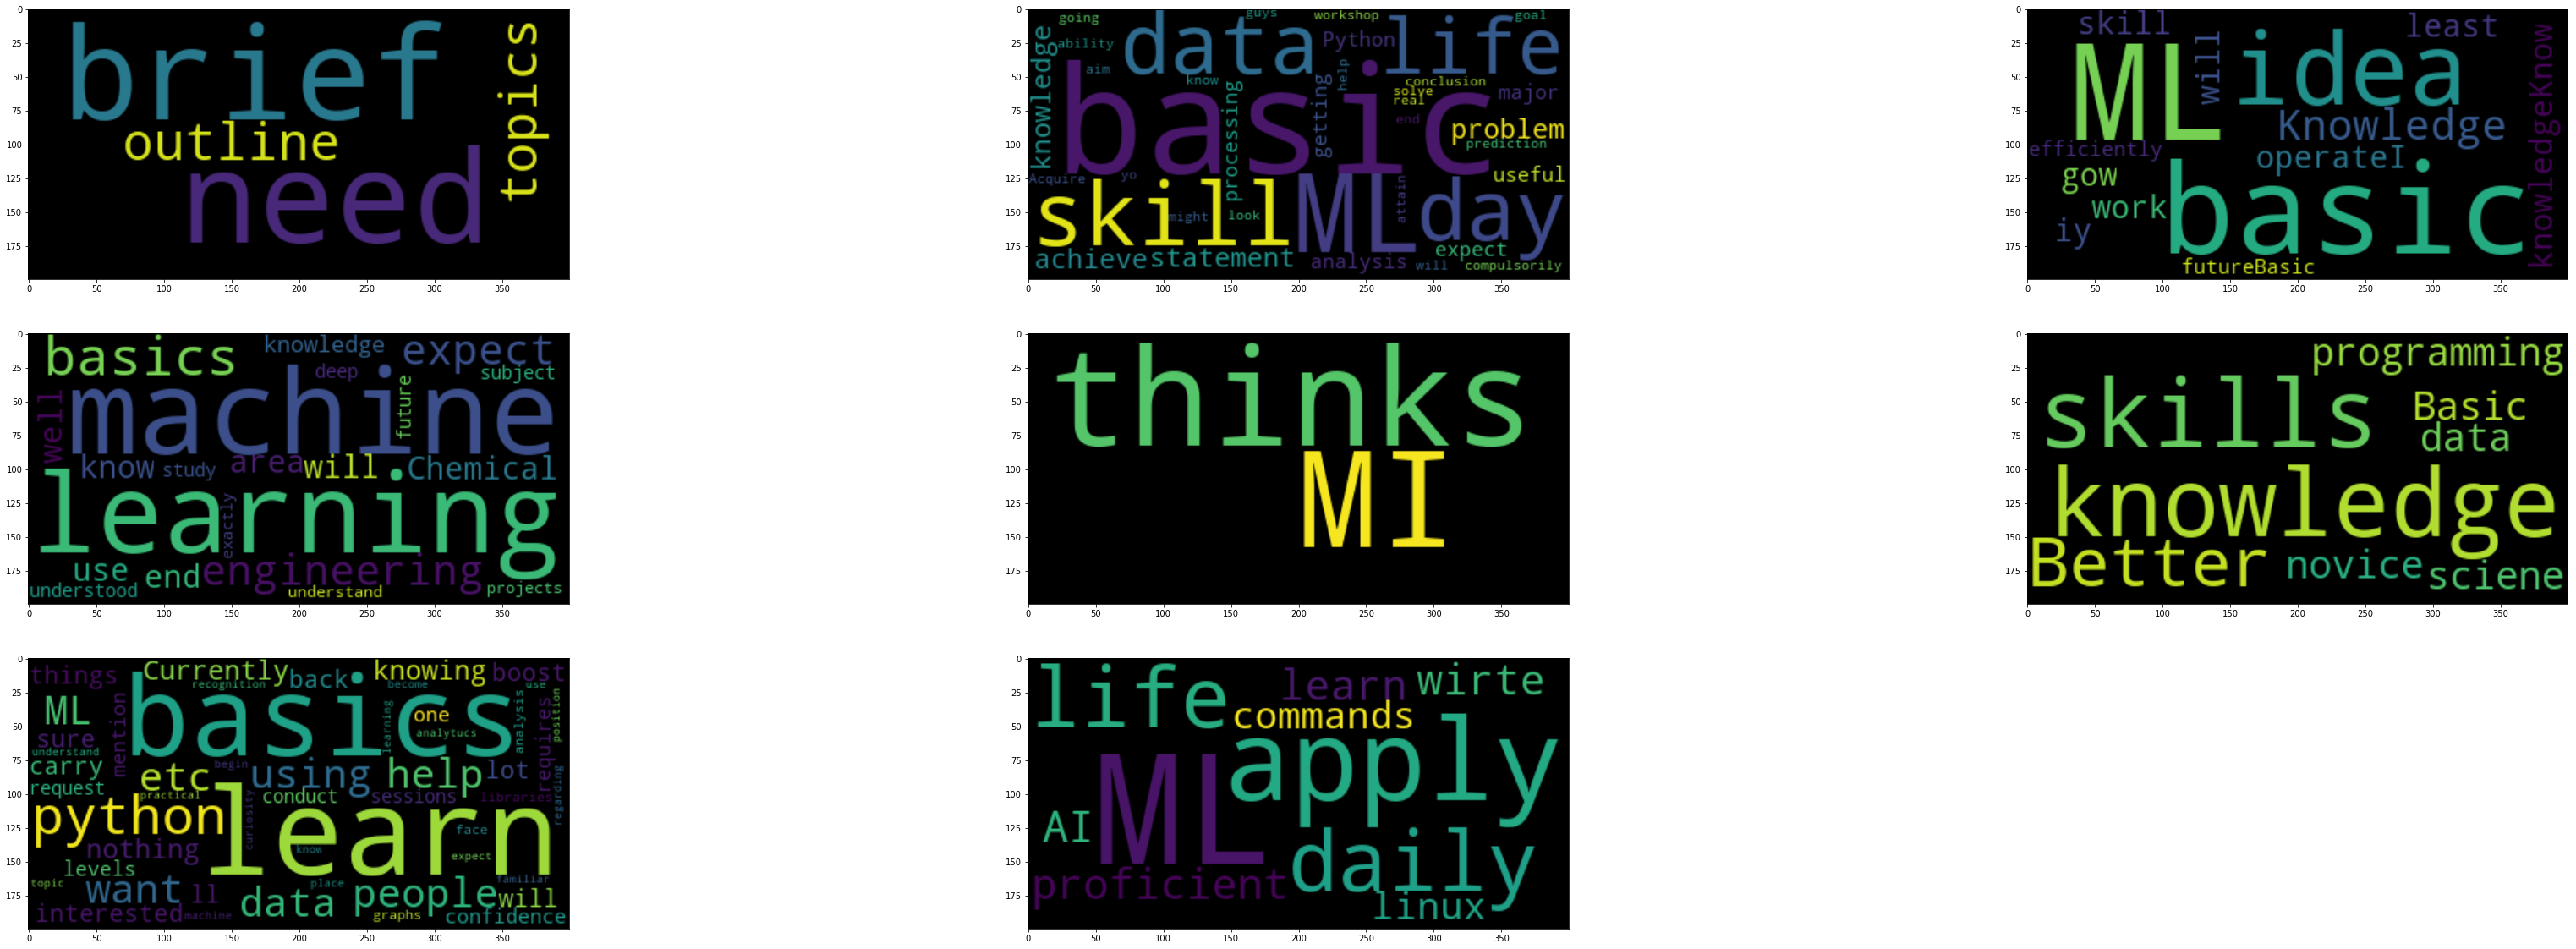

In [316]:
    plt.figure(figsize=(60,20))
    plt.subplot(3, 3, 1)
    wordcloud = WordCloud().generate(lst_0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.subplot(3, 3, 2)
    wordcloud = WordCloud().generate(lst_1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.subplot(3, 3, 3)
    wordcloud = WordCloud().generate(lst_2)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.subplot(3, 3, 4)
    wordcloud = WordCloud().generate(lst_3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.subplot(3, 3, 5)
    wordcloud = WordCloud().generate(lst_4)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.subplot(3, 3, 6)
    wordcloud = WordCloud().generate(lst_5)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.subplot(3, 3,7)
    wordcloud = WordCloud().generate(lst_6)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.subplot(3, 3,8)
    wordcloud = WordCloud().generate(lst_7)
    plt.imshow(wordcloud, interpolation='bilinear')

<h2>Now we shall understand the 3 levels overall</h2>

In [317]:
#Started working onto automate the entire above process
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
def word_cloud_generator(df,vectorizer):
    if vectorizer=="Bag of words":
        count_vect = CountVectorizer(ngram_range=(1,2))
        final_bigram_counts = count_vect.fit_transform(df)
        np_arr=final_bigram_counts.todense()
        np_arr=np.array(np_arr)
        np_arrn=normalize(np_arr)
    elif vectorizer=="TF-IDF":
        tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
        tf_idf_vect.fit(df)
        final_tf_idf = tf_idf_vect.transform(df)
        np_arr=np.array(final_tf_idf.toarray())
        np_arrn=normalize(np_arr)
    df=df.reset_index(drop=True)
    k_inertia=[]
    k=[2,4,6,8]
    for i in k:
        k_m= KMeans(n_clusters=i,init='k-means++', random_state=0)
        k_m.fit(np_arrn)
        k_inertia.append(k_m.inertia_)
        print("cluster",i,"done")
    label=k_m.labels_
    df['label']=label
    sentences=[]*8
    lst=[]*8
    for i in range(8):
        sentences[i]=df[df['label']==0]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
        a=len(df[df['label']==0]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)'])
        for i in sentences[i]:
            lst_0.append(i)
        #df[df['label']==0]['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']
        lst[i]=' '.join(lst[i])
    plt.figure(figsize=(60,20))
    for i in range(8):
        plt.subplot(3, 3, i)
    wordcloud = WordCloud().generate(lst_0)
    plt.imshow(wordcloud, interpolation='bilinear')

In [318]:
df_noexp=df[df['Rate your experience in Python programming']=='No experience']['What skills do you expect to have acquired by the end of the workshop?(Please explain extensively)']